In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

np.random.seed(12)
from google.colab import drive
drive.mount('/content/drive')
classifier_train = pd.read_csv("/content/drive/My Drive/WOC/classification_train.csv")
classifier_test = pd.read_csv("/content/drive/My Drive/WOC/classification_test.csv")
classifier_train.head()

Mounted at /content/drive


,Unnamed: 0,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,0,0,0,0,...,70,27,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,35,0,0,0,0,0,0,0,0,0
3,3,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,0,0,0,0,1,0,3,0,...,2,0,0,91,117,7,0,0,0,0


## MODEL

In [ ]:
class KNN:
      def __init__(self,K,dist_func='euclidean'):
          self.K = K
          self.dist_func = dist_func
      def euc_dist(self,X1,X2):
          xy = -2*np.dot(X1,X2.T)
          xsq = np.power(X1,2).sum(axis=1).reshape((-1,1))
          ysq = np.power(X2,2).sum(axis=1)
          return np.sqrt(xsq+xy+ysq)
      def manhattan_dist(self,X1,X2):
          return np.sum(abs(X1-X2))
      def fit(self,X,Y):
          self.X_train = X
          self.Y_train = Y
          self.n_features = X.shape[1]
          self.n_examples = X.shape[0]
      def classify(self,X):
          dist_arr = []
          for i in range(self.n_examples):
              d = self.manhattan_dist(self.X_train[i],X)
              dist_arr.append((d,i))
          dist_arr = sorted(dist_arr,key = lambda x:x[0])
          k_indices = [dist[1] for dist in dist_arr[:self.K]]
          k_labels = [self.Y_train[i] for i in k_indices]
          #print(k_labels)
          #print("------")
          #print(max(set(k_labels),key = k_labels.count) )
          return max(set(k_labels),key = k_labels.count) 
      def predict(self,Xt):
          Y_pred = np.zeros((Xt.shape[0]))
          cnt=0
          if self.dist_func == 'euclidian':
            dist_mat = self.euc_dist(Xt,self.X_train)
            idx = Y_train[np.argsort(dist_mat,1)]
            idx_K = idx[:,:self.K]
            Y_pred = [max(list(idx_K[i,:]),key=list(idx_K[i,:]).count) for i in range(Xt.shape[0])]
            return Y_pred
          else:
            for i in range(Xt.shape[0]):
                Y_pred[i] = self.classify(Xt[i])
                if cnt<int((i*100.0)/X_test.shape[0]):
                  print(cnt)
                  cnt+=1
            return Y_pred
      def accuracy(self,X_test,Y_test):
          Y_pred = self.predict(X_test)
          return np.mean((Y_test==Y_pred))

# syntax testing

In [ ]:
"""X1 = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
X2 = np.random.rand(10,3)*12
lbl = np.array([1,3,4,5,6,7,69,1,1,0])
xy = -2*np.dot(X1,X2.T)
xsq = np.power(X1,2).sum(axis=1).reshape((-1,1))
ysq = np.power(X2,2).sum(axis=1)
ans = np.sqrt(xsq+xy+ysq)
ans"""

'X1 = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])\nX2 = np.random.rand(10,3)*12\nlbl = np.array([1,3,4,5,6,7,69,1,1,0])\nxy = -2*np.dot(X1,X2.T)\nxsq = np.power(X1,2).sum(axis=1).reshape((-1,1))\nysq = np.power(X2,2).sum(axis=1)\nans = np.sqrt(xsq+xy+ysq)\nans'

In [ ]:
"""idx = np.argsort(ans,1)
idx = lbl[idx]
idx_K = idx[:,:5]
idx_K"""

'idx = np.argsort(ans,1)\nidx = lbl[idx]\nidx_K = idx[:,:5]\nidx_K'

In [ ]:
"""[max(list(idx_K[i,:]),key=list(idx_K[i,:]).count) for i in range(4)]"""

'[max(list(idx_K[i,:]),key=list(idx_K[i,:]).count) for i in range(4)]'

In [ ]:
"""idx = [lbl[ans[i,:].argsort()] for i in range(4)]

 #ans[:,:4]"""

'idx = [lbl[ans[i,:].argsort()] for i in range(4)]\n\n #ans[:,:4]'

# DATA PROCESSING

In [ ]:
ratio_train=0.8
ratio_cv = 0.1
ratio_test=0.1
total_rows = classifier_train.shape[0]
total_train = int(total_rows*ratio_train)
total_cv = int(total_rows*ratio_cv)
shuffled_df = classifier_train.sample(frac=1,random_state=12)
grped_df = shuffled_df.groupby('label')
ans = [np.split(df_label,[int(ratio_train*len(df_label)),int((ratio_train+ratio_cv)*len(df_label))])for label,df_label in grped_df]
df_train = pd.concat([x[0] for x in ans]).sample(frac=1,random_state=12)
df_cv = pd.concat([x[1] for x in ans]).sample(frac=1,random_state=12)
df_test = pd.concat([x[2] for x in ans]).sample(frac=1,random_state=12)
#df_train
X_train = df_train.iloc[:,2:].to_numpy()
X_cv = df_cv.iloc[:,2:].to_numpy()
X_test = df_test.iloc[:,2:].to_numpy()
Y_train = df_train.iloc[:,1:2].to_numpy().reshape((total_train,))
Y_cv = df_cv.iloc[:,1:2].to_numpy().reshape((total_cv,))
Y_test = df_test.iloc[:,1:2].to_numpy().reshape((total_rows-total_train-total_cv,))
X_train=X_train/256.0
X_cv=X_cv/256.0
X_test=X_test/256.0
X_final = classifier_test.iloc[:,1:].to_numpy()
X_final_train = classifier_train.iloc[:,2:].to_numpy()
Y_final_train = classifier_train.iloc[:,1:2].to_numpy()
#X_final_test = classifier_test[:,2:]

In [ ]:
#X_train.shape

(24000, 784)

In [ ]:
"""model = KNN(8)
x1 = np.array([1,2,5,4])
x2 = np.array([2,3,4,5])
model.manhattan_dist(x1,x2)
"""

4

In [ ]:
"""x1 =np.array([[1,2,3],[4,5,6]])
x1 = np.vstack((x1,[[7,8,9]]))
#x2 = np.array([7,8,9])
#x1 =np.append(x1,x2.reshape((1,3)))
x1[2]"""

array([7, 8, 9])

# KNN with manhattan distance

In [ ]:
model = KNN(8)
model.fit(X_train,Y_train)
#Yp = model.predict(X_cv)
#print(Yp)
print(model.accuracy(X_cv,Y_cv))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
0.84


Finding the optimum value of K

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49

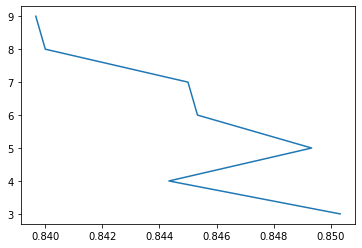

In [ ]:
acc = []
for K in range(3,10):
    model_temp = KNN(K)
    model_temp.fit(X_train,Y_train)
    a = model_temp.accuracy(X_cv,Y_cv)
    acc.append((a,K))
plt.plot([a for (a,b) in acc],[b for (a,b) in acc])

In [ ]:
np.mean((Yp==Y_cv))

0.09666666666666666

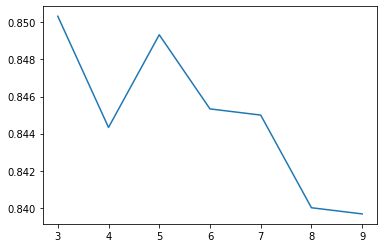

In [ ]:
plt.plot([b for (a,b) in acc],[a for (a,b) in acc])

from the above graph ,we can say that 5 is the optimum number of nearest neighbours as 3 leads to high bias model.

In [ ]:
model=KNN(5)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


In [ ]:
y_pred

array([0., 8., 2., ..., 4., 0., 6.])

In [ ]:
np.mean(y_pred==Y_test)

0.8483333333333334

# KNN with euclidean distance function

In [ ]:
model_K = KNN(6,'euclidian')
model_K.fit(X_train,Y_train)
acc= np.mean(model_K.predict(X_cv)==Y_cv)
print(f"accuracy of KNN with {6} neighbours is {acc}")

accuracy of KNN with 6 neighbours is 0.8446666666666667


In [ ]:
best_K=3
best_acc = -1
accs = []
for K in range(3,21):
  model_K =  KNN(K,'euclidian')
  model_K.fit(X_train,Y_train)
  acc= np.mean(model_K.predict(X_cv)==Y_cv)
  print(f"accuracy of KNN with {K} neighbours is {acc}")
  accs.append(acc)
  if best_acc< acc:
    best_K = K
    best_acc = acc
print(f"best K is {best_K}")

accuracy of KNN with 3 neighbours is 0.8383333333333334
accuracy of KNN with 4 neighbours is 0.8416666666666667
accuracy of KNN with 5 neighbours is 0.84
accuracy of KNN with 6 neighbours is 0.8446666666666667
accuracy of KNN with 7 neighbours is 0.837
accuracy of KNN with 8 neighbours is 0.8396666666666667
accuracy of KNN with 9 neighbours is 0.8343333333333334
accuracy of KNN with 10 neighbours is 0.837
accuracy of KNN with 11 neighbours is 0.8336666666666667
accuracy of KNN with 12 neighbours is 0.833
accuracy of KNN with 13 neighbours is 0.8316666666666667
accuracy of KNN with 14 neighbours is 0.8346666666666667
accuracy of KNN with 15 neighbours is 0.83
accuracy of KNN with 16 neighbours is 0.8316666666666667
accuracy of KNN with 17 neighbours is 0.8293333333333334
accuracy of KNN with 18 neighbours is 0.8323333333333334
accuracy of KNN with 19 neighbours is 0.829
accuracy of KNN with 20 neighbours is 0.8296666666666667
best K is 6


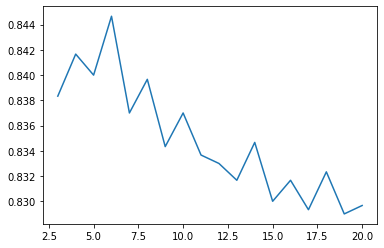

In [ ]:
plt.plot([i for i in range(3,21)],accs)

In [ ]:
#final accuracy of the KNN model

In [ ]:
model = KNN(6,'euclidian')
model.fit(X_train,Y_train)
y = model.predict(X_test)
print(np.mean(y==Y_test))

0.8373333333333334


.`. final accuracy of the model is 83.73%

In [ ]:
test_model = KNN(6,'euclidian')

In [ ]:
X_final_train.shape

(30000, 784)

In [ ]:
test_model.fit(X_train,Y_train)
final_pred = test_model.predict(X_final)

In [ ]:
#final_pred